# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = 'shared/homeworks/python_ds_miniprojects/final_project/data'

In [3]:
for path, dirs, files in os.walk(data):
    print(path, dirs, files)

shared/homeworks/python_ds_miniprojects/final_project/data ['products', 'orders'] []
shared/homeworks/python_ds_miniprojects/final_project/data/products ['AV-ресивер', 'Настенная акустика', 'Система караоке', 'Напольная акустика', 'Полочная акустика', 'Сабвуфер', 'Саундбар', 'Активные колонки', 'Беспроводная акустика', 'Конденсаторный микрофон', 'Центральный канал', 'Динамический микрофон', 'AV-процессор', 'Предусилитель', 'Интегральный усилитель', 'Виниловый проигрыватель', 'Комплекты акустики', 'Наушники с микрофоном', 'Умная колонка', 'Домашний кинотеатр', 'Ламповый усилитель', 'Музыкальный центр', 'Портативная акустика', 'Проводные наушники', 'Усилитель мощности', 'Беспроводные наушники'] []
shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер [] ['products.csv']
shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика [] ['products.csv']
shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке [] ['

In [4]:
# Создаём пустой список file_paths, в который будут добавляться пути к файлам.
data_files = []

# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них

target_files = ['orders.csv', 'order_status.csv', 'products.csv']

for path, dirs, files in os.walk(data):
        # Вложенный цикл для перебора файлов в текущей папке
        for file in files:
                if file in target_files:
                    #Добавляем путь к файлу в список data_files
                    data_files.append(os.path.join(path, file))

In [5]:
data_files[0:5]

['shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 'shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 'shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 'shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 'shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv']

In [6]:
# Создаем пустые списки для хранения датафреймов
orders_df_list = []
order_status_df_list = []
products_df_list = []

# Проходим по путям в списке data_files
for file_path in data_files:
    # Читаем датафрейм
    df = pd.read_csv(file_path,  sep=',', index_col = 0)
    
    # Проверяем название файла и добавляем в соответствующий список
    if 'orders.csv' in file_path:
        # Создаем колонки manager и date
        df['manager'] = file_path.split('/')[-2]
        df['date'] = pd.to_datetime(file_path.split('/')[-3].split('.')[0])  
        orders_df_list.append(df)
        
    elif 'order_status.csv' in file_path:
        order_status_df_list.append(df)
        
    elif 'products.csv' in file_path:
        # Создаем колонку category
        df['category'] = file_path.split('/')[-2]
        products_df_list.append(df)

In [7]:
# Объединяем списки датафреймов в один датафрейм для каждого типа
df_orders = pd.concat(orders_df_list).reset_index()
df_order_status = pd.concat(order_status_df_list).reset_index()
df_products = pd.concat(products_df_list).reset_index()

In [8]:
df_orders.head(10)

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
5,QPLK-54839036,1309,5,Владимир Ударников,2024-03-10
6,QPLK-54839036,134,4,Владимир Ударников,2024-03-10
7,QPLK-54839036,1659,10,Владимир Ударников,2024-03-10
8,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10
9,MAQJ-95867467,1565,12,Екатерина Тарелкина,2024-03-10


In [9]:
df_order_status.head(10)

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
5,MULT-10194362,59,confirmed
6,CGLU-02678560,95,canceled
7,UFYZ-93434889,28,confirmed
8,ETDP-37053366,26,confirmed
9,PZUZ-70017989,33,confirmed


In [10]:
df_products.head(10)

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
5,212,"Denon, AVR-S750H",430.49,AV-ресивер
6,213,"Denon, AVR-X1600H",504.44,AV-ресивер
7,214,"Denon, AVR-X2700H",870.77,AV-ресивер
8,363,"Harman Kardon, AVR 151",171.22,AV-ресивер
9,364,"Harman Kardon, AVR 1510S",240.41,AV-ресивер


In [11]:
df_orders.to_csv('df_orders', index=False)

In [12]:
df_order_status.to_csv('df_order_status', index=False)

In [13]:
df_products.to_csv('df_products', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [14]:
df_orders.groupby('date', as_index=False).quantity.sum() \
    .rename(columns={'quantity':'orders'}) \
    .sort_values(by = 'orders', ascending=False) \
    .head(1)

,date,orders
13,2024-03-14,7957


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

In [15]:
df = df_orders.groupby('date', as_index=False).quantity.sum() \
    .rename(columns={'quantity':'orders'}) \
    .sort_values(by = 'date')

In [16]:
df['day_of_week'] = df['date'].dt.day_name()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

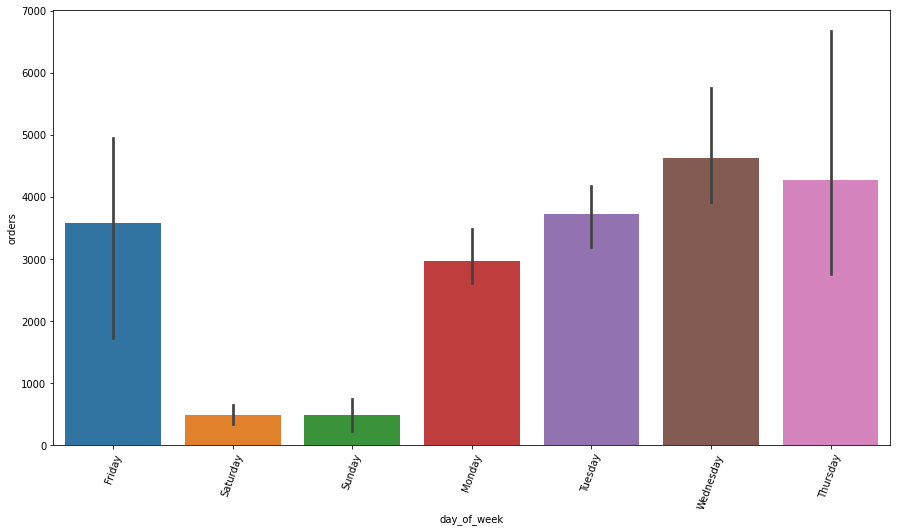

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="day_of_week", y="orders")
plt.xticks(rotation=70)

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

In [18]:
df

,date,orders,day_of_week
0,2024-03-01,5695,Friday
1,2024-03-02,510,Saturday
2,2024-03-03,146,Sunday
3,2024-03-04,2721,Monday
4,2024-03-05,3988,Tuesday
5,2024-03-06,4057,Wednesday
6,2024-03-07,3605,Thursday
7,2024-03-08,55,Friday
8,2024-03-09,319,Saturday
9,2024-03-10,676,Sunday


In [19]:
df[df.day_of_week == 'Sunday']

,date,orders,day_of_week
2,2024-03-03,146,Sunday
9,2024-03-10,676,Sunday
16,2024-03-17,883,Sunday
23,2024-03-24,567,Sunday
30,2024-03-31,126,Sunday


In [20]:
df[df.day_of_week == 'Monday']

,date,orders,day_of_week
3,2024-03-04,2721,Monday
10,2024-03-11,3725,Monday
17,2024-03-18,2845,Monday
24,2024-03-25,2542,Monday


In [21]:
df[df.day_of_week == 'Friday']

,date,orders,day_of_week
0,2024-03-01,5695,Friday
7,2024-03-08,55,Friday
14,2024-03-15,3958,Friday
21,2024-03-22,3663,Friday
28,2024-03-29,4544,Friday


In [22]:
df[df.day_of_week == 'Sunday']

,date,orders,day_of_week
2,2024-03-03,146,Sunday
9,2024-03-10,676,Sunday
16,2024-03-17,883,Sunday
23,2024-03-24,567,Sunday
30,2024-03-31,126,Sunday


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

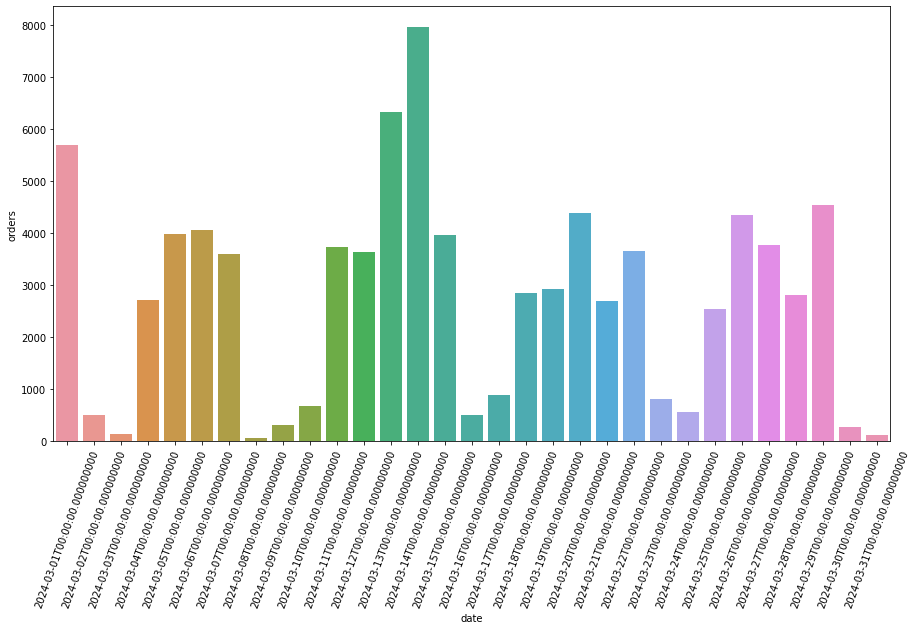

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="date", y="orders")
plt.xticks(rotation=70)

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [24]:
orders_status = df_orders.merge(df_order_status, on='order_id', how='inner')
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [25]:
orders_status.to_csv('orders_status', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [26]:
df_unique = orders_status.drop_duplicates()
df_unique

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [27]:
df_unique = orders_status[['order_id', 'status']]
df_unique

,order_id,status
0,QPLK-54839036,confirmed
1,QPLK-54839036,confirmed
2,QPLK-54839036,confirmed
3,QPLK-54839036,confirmed
4,QPLK-54839036,confirmed
...,...,...
4598,UAKD-95751033,confirmed
4599,UAKD-95751033,confirmed
4600,UAKD-95751033,confirmed
4601,UAKD-95751033,confirmed


In [28]:
df_unique.status.value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [29]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [30]:
# Группируем по дате и статусу, считаем уникальные заказы и переименовываем столбик
grouped  = orders_status.groupby(['date', 'status'], as_index=False)['order_id'] \
    .nunique().reset_index().rename(columns={'order_id':'orders'})
grouped

,index,date,status,orders
0,0,2024-03-01,canceled,2
1,1,2024-03-01,confirmed,20
2,2,2024-03-02,confirmed,2
3,3,2024-03-03,confirmed,1
4,4,2024-03-04,confirmed,10
5,5,2024-03-05,confirmed,18
6,6,2024-03-06,canceled,1
7,7,2024-03-06,confirmed,13
8,8,2024-03-07,canceled,1
9,9,2024-03-07,confirmed,13


In [31]:
# Разворачиваем таблицу
pivot_table = grouped.pivot(index='date', columns='status', values='orders')
pivot_table

status,canceled,confirmed
date,,
2024-03-01,2.0,20.0
2024-03-02,NaN,2.0
2024-03-03,NaN,1.0
2024-03-04,NaN,10.0
2024-03-05,NaN,18.0
2024-03-06,1.0,13.0
2024-03-07,1.0,13.0
2024-03-08,NaN,1.0
2024-03-09,1.0,NaN


In [32]:
# Заполняем пропуски нулями
pivot_table = pivot_table.fillna(0)
pivot_table

status,canceled,confirmed
date,,
2024-03-01,2.0,20.0
2024-03-02,0.0,2.0
2024-03-03,0.0,1.0
2024-03-04,0.0,10.0
2024-03-05,0.0,18.0
2024-03-06,1.0,13.0
2024-03-07,1.0,13.0
2024-03-08,0.0,1.0
2024-03-09,1.0,0.0


In [33]:
# Приводим типы данных к int
pivot_table['canceled'] = pivot_table['canceled'].astype(int)
pivot_table['confirmed'] = pivot_table['confirmed'].astype(int)

In [34]:
# Фильтруем строки, где confirmed равно 0
filtered_table = pivot_table[pivot_table['confirmed'] > 0]
filtered_table

status,canceled,confirmed
date,,
2024-03-01,2,20
2024-03-02,0,2
2024-03-03,0,1
2024-03-04,0,10
2024-03-05,0,18
2024-03-06,1,13
2024-03-07,1,13
2024-03-08,0,1
2024-03-10,1,2


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

In [35]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([738945., 738946., 738950., 738954., 738958., 738962., 738966.,
        738970., 738974., 738977.]),
 <a list of 10 Text major ticklabel objects>)

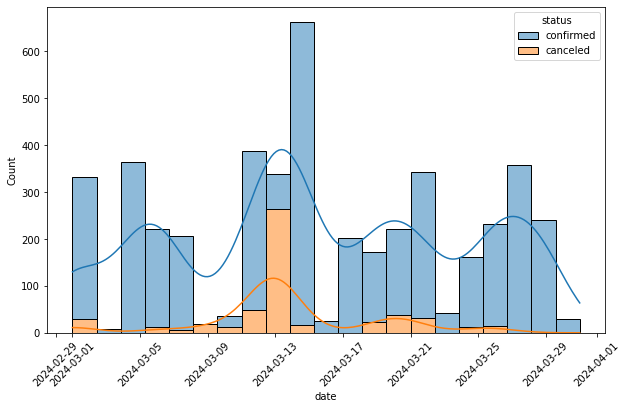

In [37]:
# Построение гистограммы с hue
plt.figure(figsize=(10, 6))
sns.histplot(data=orders_status, x='date', hue='status', multiple='stack', kde=True)
plt.xticks(rotation=45)

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [38]:
# Отбираем отмененные заказы за 13 марта
canceled_orders = orders_status.query('date == "2024-03-13" and status== "canceled" ')
canceled_orders.head(5)

,order_id,product_id,quantity,manager,date,client_id,status
3186,NENO-68279828,1634,20,Владимир Ударников,2024-03-13,38,canceled
3187,NENO-68279828,259,9,Владимир Ударников,2024-03-13,38,canceled
3188,NENO-68279828,812,24,Владимир Ударников,2024-03-13,38,canceled
3189,NENO-68279828,652,10,Владимир Ударников,2024-03-13,38,canceled
3190,NENO-68279828,516,8,Владимир Ударников,2024-03-13,38,canceled


In [39]:
# Агрегация данных
aggregated_canceled_data = canceled_orders.groupby('order_id', as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

aggregated_canceled_data

,order_id,product_id,manager,client_id,quantity
0,AFIH-00611801,11,Алексей Саксофонов,43,192
1,BBFJ-27674101,14,Ксения Балалайкина,73,294
2,CLBQ-63032648,13,Виктор Тромбонов,60,205
3,CYJY-07359557,13,Екатерина Тарелкина,56,316
4,GHGB-88045656,4,Ксения Балалайкина,7,42
5,JEIF-69283221,15,Виктор Тромбонов,94,207
6,JQQO-28609300,15,Виктор Тромбонов,93,252
7,KJJS-03491897,18,Алексей Саксофонов,66,399
8,MIGZ-68487439,17,Алексей Саксофонов,51,325
9,NBIO-35476164,14,Виктор Тромбонов,95,319


In [40]:
# Отбираем подтвержденные заказы 14 марта
confirmed_orders = orders_status.query('date == "2024-03-14" and status== "confirmed" ')
confirmed_orders.head(5)

,order_id,product_id,quantity,manager,date,client_id,status
1604,IMND-92004620,1634,20,Владимир Ударников,2024-03-14,38,confirmed
1605,IMND-92004620,259,9,Владимир Ударников,2024-03-14,38,confirmed
1606,IMND-92004620,812,24,Владимир Ударников,2024-03-14,38,confirmed
1607,IMND-92004620,652,10,Владимир Ударников,2024-03-14,38,confirmed
1608,IMND-92004620,516,8,Владимир Ударников,2024-03-14,38,confirmed


In [41]:
# Агрегация данных
aggregated_confirmed_data = confirmed_orders.groupby('order_id', as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})
aggregated_confirmed_data

,order_id,product_id,manager,client_id,quantity
0,ACXS-56511429,8,Алексей Саксофонов,24,177
1,AUZX-12706022,19,Екатерина Тарелкина,83,369
2,BCMM-97072924,17,Алексей Саксофонов,51,325
3,BGHE-44722549,8,Виктор Тромбонов,95,149
4,DMEB-71700015,12,Сергей Контрабасов,93,190
5,DOJS-07233317,16,Маргарита Камертонова,56,277
6,EJHJ-34261015,20,Максим Барабанов,87,319
7,EPBF-14743479,15,Виктор Тромбонов,94,207
8,EZAA-08394172,9,Анастасия Дудкина,39,176
9,FDEB-71487438,11,Алексей Саксофонов,43,192


In [42]:
aggregated_confirmed_data.shape

(34, 5)

In [43]:
again_orders = aggregated_confirmed_data.merge(aggregated_canceled_data, on=['manager', 'client_id', 'product_id', 'quantity'], how='inner')
again_orders

,order_id_x,product_id,manager,client_id,quantity,order_id_y
0,AUZX-12706022,19,Екатерина Тарелкина,83,369,RSBH-94158604
1,BCMM-97072924,17,Алексей Саксофонов,51,325,MIGZ-68487439
2,EPBF-14743479,15,Виктор Тромбонов,94,207,JEIF-69283221
3,FDEB-71487438,11,Алексей Саксофонов,43,192,AFIH-00611801
4,FTPV-77865209,16,Маргарита Камертонова,26,283,UUZR-48309816
5,GRCH-73394464,18,Алексей Саксофонов,66,399,KJJS-03491897
6,GYTK-45256974,12,Ксения Балалайкина,75,260,NLSJ-24436750
7,HMXC-87726636,14,Маргарита Камертонова,68,262,QYZK-30462944
8,IECD-18739530,13,Виктор Тромбонов,60,205,CLBQ-63032648
9,IMND-92004620,10,Владимир Ударников,38,188,NENO-68279828


In [44]:
again_orders.shape

(16, 6)

In [45]:
16/34

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [46]:
with open('usd_rate.txt', 'r') as file:
    currency = file.readlines()

In [47]:
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [48]:
import pandas as pd

# Создаем пустой список для хранения данных
data = []

# Обработка данных
for entry in currency:
    entry = entry.strip()
    date, rate, currency = entry.split(',')
    data.append({'date': date, 'rate': float(rate), 'currency': currency})

# Создаем DataFrame
df_rate = pd.DataFrame(data)

# Выводим DataFrame
print(df_rate)

          date     rate    currency
0   2024-03-01  90.8423  Доллар США
1   2024-03-02  91.3336  Доллар США
2   2024-03-03  91.3336  Доллар США
3   2024-03-04  91.3336  Доллар США
4   2024-03-05  91.3534  Доллар США
5   2024-03-06  91.1604  Доллар США
6   2024-03-07  90.3412  Доллар США
7   2024-03-08  90.7493  Доллар США
8   2024-03-09  90.7493  Доллар США
9   2024-03-10  90.7493  Доллар США
10  2024-03-11  90.7493  Доллар США
11  2024-03-12  90.6252  Доллар США
12  2024-03-13  90.8818  Доллар США
13  2024-03-14  91.5449  Доллар США
14  2024-03-15  91.6359  Доллар США
15  2024-03-16  91.8700  Доллар США
16  2024-03-17  91.8700  Доллар США
17  2024-03-18  91.8700  Доллар США
18  2024-03-19  91.9829  Доллар США
19  2024-03-20  92.2243  Доллар США
20  2024-03-21  92.6861  Доллар США
21  2024-03-22  91.9499  Доллар США
22  2024-03-23  92.6118  Доллар США
23  2024-03-24  92.6118  Доллар США
24  2024-03-25  92.6118  Доллар США
25  2024-03-26  92.7761  Доллар США
26  2024-03-27  92.5745  Дол

In [49]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   rate      31 non-null     float64
 2   currency  31 non-null     object 
dtypes: float64(1), object(2)
memory usage: 872.0+ bytes


In [50]:
# переведем дату в соотв.формат
df_rate['date'] = pd.to_datetime(df_rate['date'])

In [51]:
df_rate['rate'].mean().round(2)

91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [52]:
orders_status.head(5)

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [53]:
df_products = df_products.rename(columns={'id':'product_id'})
df_products.head(5)

,product_id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [54]:
df_full = orders_status.merge(df_products, on='product_id', how='inner')
df_full.head(5)

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,"JBL, Control 28-1",301.85,Настенная акустика


In [55]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 0 to 4602
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    4603 non-null   object        
 1   product_id  4603 non-null   int64         
 2   quantity    4603 non-null   int64         
 3   manager     4603 non-null   object        
 4   date        4603 non-null   datetime64[ns]
 5   client_id   4603 non-null   int64         
 6   status      4603 non-null   object        
 7   name        4603 non-null   object        
 8   price       4603 non-null   float64       
 9   category    4603 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 395.6+ KB


In [56]:
df_full.drop_duplicates()

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
...,...,...,...,...,...,...,...,...,...,...
4598,EQIU-00464768,335,9,Виктор Тромбонов,2024-03-26,30,confirmed,"Electrohome, Karaoke Machine",176.59,Система караоке
4599,EQIU-00464768,822,7,Виктор Тромбонов,2024-03-26,30,confirmed,"LG, LHD457",172.20,Домашний кинотеатр
4600,IZFC-94335845,1568,38,Максим Барабанов,2024-03-26,56,confirmed,"Xiaomi, Mi Smart Display",83.56,Умная колонка
4601,CUDB-19668701,1333,22,Маргарита Камертонова,2024-03-26,82,confirmed,"Sennheiser, HD 450BT",129.99,Беспроводные наушники


In [57]:
df_full = df_full.merge(df_rate, on='date', how='inner')
df_full.head(5)

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,rate,currency
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,Доллар США
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,Доллар США
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,Доллар США


In [58]:
df_full['price_rub'] = df_full.price * df_full.rate
df_full['price_rub'] = df_full['price_rub']

In [59]:
df_full['revenue'] = df_full['price_rub'] * df_full.quantity
df_full['revenue'] = df_full['revenue']

In [60]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,rate,currency,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,Доллар США,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,Доллар США,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,Доллар США,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,Доллар США,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,Доллар США,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,"LG, SK1",86.56,Саундбар,91.3336,Доллар США,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,"Edifier, R1280T",86.99,Активные колонки,91.3336,Доллар США,7945.109864,7.945110e+04


In [61]:
df_confirmed = df_full.query('status == "confirmed" ')
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,rate,currency,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,Доллар США,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,Доллар США,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,Доллар США,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,Доллар США,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,Доллар США,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,"LG, SK1",86.56,Саундбар,91.3336,Доллар США,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,"Edifier, R1280T",86.99,Активные колонки,91.3336,Доллар США,7945.109864,7.945110e+04


In [62]:
df_confirmed.revenue.sum().round(2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [63]:
( df_confirmed.revenue.sum() / df_confirmed.order_id.nunique() ).round(2)

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [64]:
df_confirmed1 = df_confirmed.groupby('date', as_index=False).aggregate({'order_id':'nunique', 'revenue':'sum'})
df_confirmed1.revenue = df_confirmed1.revenue.round(2)
df_confirmed1['average_order_value'] = (df_confirmed1.revenue / df_confirmed1.order_id).round(2)

In [65]:
df_confirmed1

,date,order_id,revenue,average_order_value
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


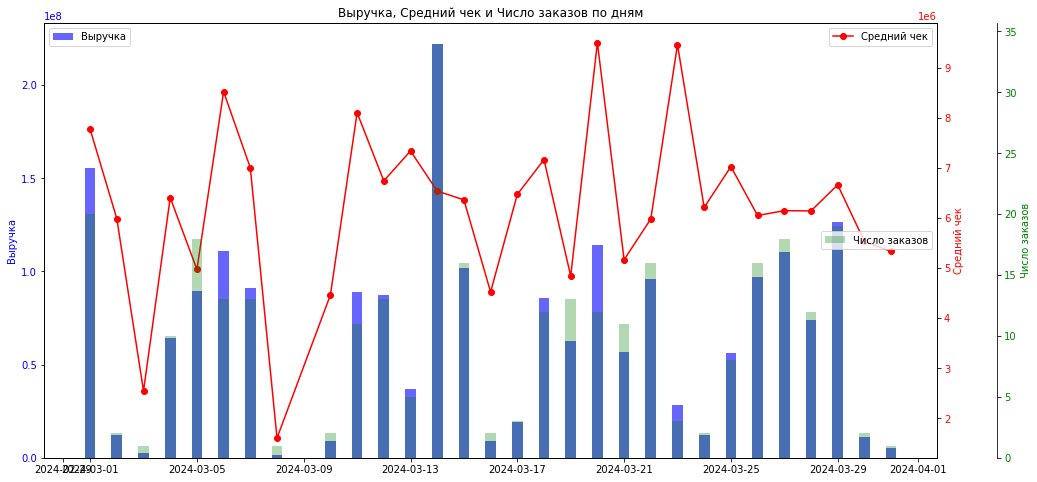

In [66]:
# Создаем комбинированный график
fig, ax1 = plt.subplots(figsize=(16, 8))

# Столбчатый график для выручки
ax1.bar(df_confirmed1['date'], df_confirmed1['revenue'], color='b', alpha=0.6, label='Выручка', width=0.4)
ax1.set_ylabel('Выручка', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем второй ось для среднего чека
ax2 = ax1.twinx()
ax2.plot(df_confirmed1['date'], df_confirmed1['average_order_value'], color='r', marker='o', label='Средний чек')
ax2.set_ylabel('Средний чек', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Создаем третий ось для числа заказов
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Сдвигаем ось вправо
ax3.bar(df_confirmed1['date'], df_confirmed1['order_id'], color='g', alpha=0.3, label='Число заказов', width=0.4)
ax3.set_ylabel('Число заказов', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Добавляем заголовок и легенду
plt.title('Выручка, Средний чек и Число заказов по дням')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Показываем график
plt.show()


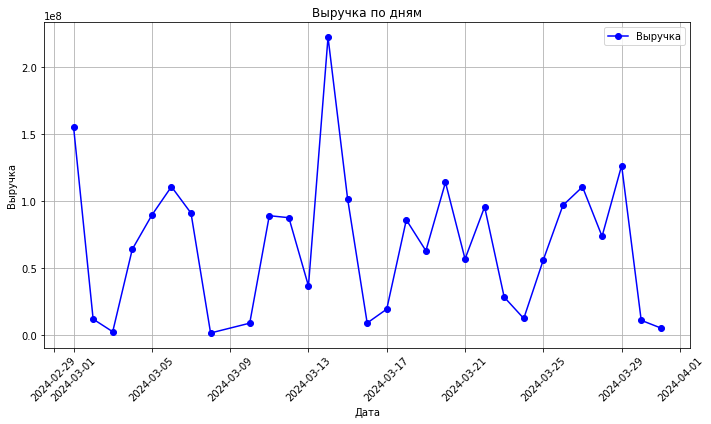

In [67]:
# Создаем линейный график
plt.figure(figsize=(10, 6))
plt.plot(df_confirmed1['date'], df_confirmed1['revenue'], marker='o', color='b', label='Выручка')

# Настройка графика
plt.title('Выручка по дням')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid()  # Добавляем сетку для удобства восприятия
plt.legend()  # Добавляем легенду

# Показываем график
plt.tight_layout()  # Автоматически подгоняем график
plt.show()

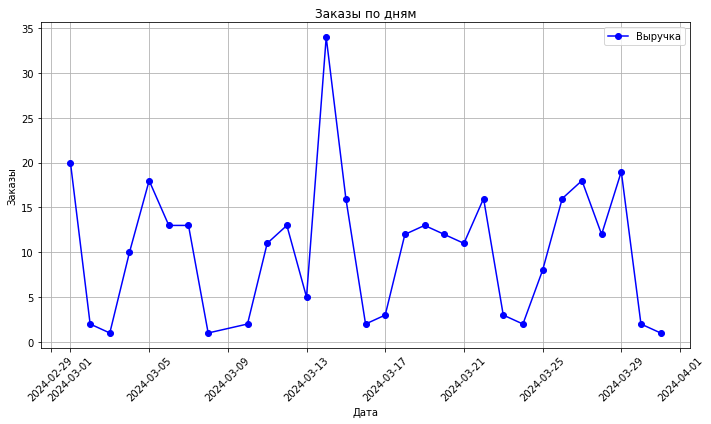

In [68]:
# Создаем линейный график
plt.figure(figsize=(10, 6))
plt.plot(df_confirmed1['date'], df_confirmed1['order_id'], marker='o', color='b', label='Выручка')

# Настройка графика
plt.title('Заказы по дням')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid()  # Добавляем сетку для удобства восприятия
plt.legend()  # Добавляем легенду

# Показываем график
plt.tight_layout()  # Автоматически подгоняем график
plt.show()

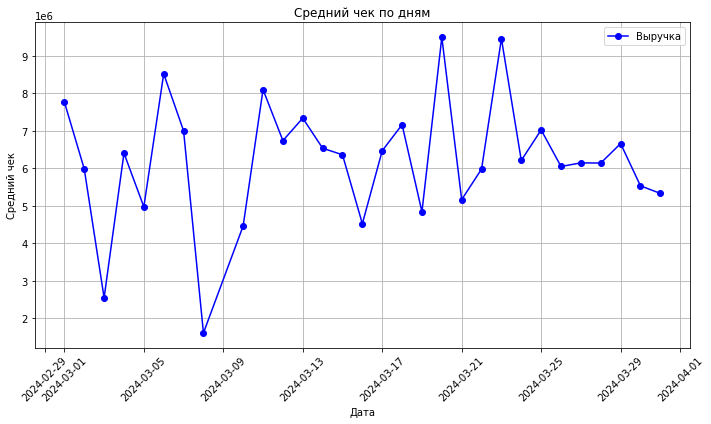

In [69]:
# Создаем линейный график
plt.figure(figsize=(10, 6))
plt.plot(df_confirmed1['date'], df_confirmed1['average_order_value'], marker='o', color='b', label='Выручка')

# Настройка графика
plt.title('Средний чек по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid()  # Добавляем сетку для удобства восприятия
plt.legend()  # Добавляем легенду

# Показываем график
plt.tight_layout()  # Автоматически подгоняем график
plt.show()

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [70]:
df_full['brand'] = df_full.name.str.split(', ').str[0]
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [71]:
df_full.head(5)

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,rate,currency,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,Доллар США,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,Доллар США,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,Доллар США,17411.160698,8.705580e+04,Rode


In [72]:
df_full.query('status == "confirmed" ').groupby('brand', as_index=False) \
    .agg({'revenue':'sum', 'order_id':'nunique'}).sort_values(by='revenue', ascending=False).head(5)

,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73


In [73]:
df_full.query('status == "confirmed" ').groupby('brand', as_index=False) \
    .agg({'revenue':'sum', 'order_id':'nunique'}).sort_values(by='order_id', ascending=False).head(5)

,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [74]:
products_in_orders = df_confirmed.product_id.unique()
products_in_orders

array([489, 594, 670, ..., 656, 223, 537])

In [75]:
# Проверяем, есть ли id в списке products_in_orders
df_products['is_in_orders'] = df_products['product_id'].isin(products_in_orders).replace({True: 'yes', False: 'no'})

In [76]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [89]:
df_products['brand'] = df_products.name.str.split(', ').str[0]
df_products.head(5)

,product_id,name,price,category,is_in_orders,brand
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon


In [90]:
df_prod_by_brands = df_products.groupby(['brand', 'is_in_orders'], as_index=False) \
    .agg({'product_id':'nunique'}).rename(columns={'product_id':'products'})
df_prod_by_brands.head(5)

,brand,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5
2,ART,yes,1
3,ASUS,no,1
4,ASUS,yes,2


In [93]:
pivot = df_prod_by_brands.pivot(index='brand', columns='is_in_orders', values='products')
pivot.head(0)

is_in_orders,no,yes
brand,,


In [94]:
pivot = pivot.fillna(0)

In [97]:
pivot = pivot.reset_index()

In [99]:
pivot['all'] = pivot['no'] + pivot['yes']

In [101]:
pivot['no_proportion'] = pivot['no'] / pivot['all']

In [103]:
pivot.query('no_proportion >0.5 and all>15')

is_in_orders,brand,no,yes,all,no_proportion
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [109]:
df_confirmed.revenue.sum()

2038231821.564864

In [113]:
df_revenue_by_m = df_confirmed.groupby('manager', as_index=False).agg({'revenue':'sum', 'order_id':'nunique'}) \
    .rename(columns={'order_id':'orders'}).sort_values(by='revenue', ascending=False)
df_revenue_by_m

,manager,revenue,orders
9,Маргарита Камертонова,3.473886e+08,48
4,Виктор Тромбонов,3.188999e+08,50
8,Максим Барабанов,2.401478e+08,40
5,Владимир Ударников,2.084865e+08,31
0,Алексей Саксофонов,1.953435e+08,27
7,Ксения Балалайкина,1.817621e+08,27
6,Екатерина Тарелкина,1.781576e+08,28
10,Надежда Гармошкина,1.347836e+08,21
1,Анастасия Дудкина,1.234504e+08,20
2,Антон Скрипкин,5.150268e+07,7


In [117]:
df_revenue_by_m['percent_revenue'] = (df_revenue_by_m.revenue / df_confirmed.revenue.sum()).mul(100).round(2)

In [120]:
df_revenue_by_m['percent_orders'] = (df_revenue_by_m['orders'] / df_revenue_by_m['orders'].sum()).mul(100).round(2)

In [121]:
df_revenue_by_m

,manager,revenue,orders,,percent,percent_revenue,percent_orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,17.04,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,15.65,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,11.78,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.23,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,9.58,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.92,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,8.74,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.61,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.06,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.53,2.53,2.27


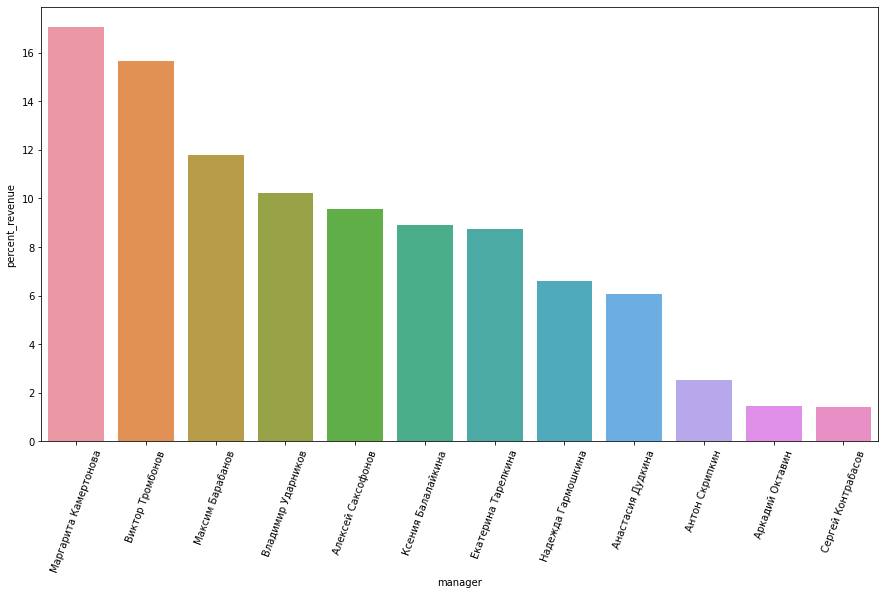

In [125]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)

sns.barplot(x='manager', y='percent_revenue', data=df_revenue_by_m)

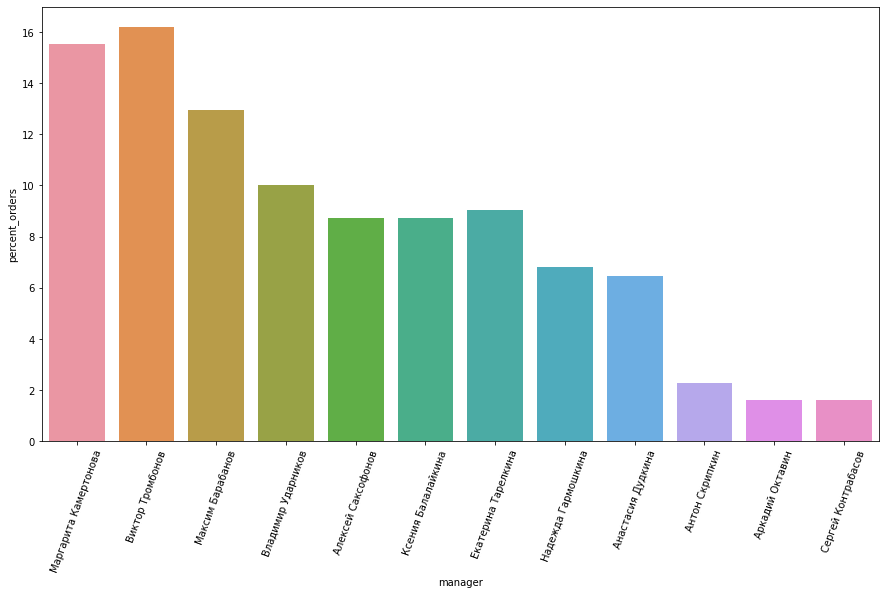

In [126]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)

sns.barplot(x='manager', y='percent_orders', data=df_revenue_by_m)

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)